### CONTEXT: 
India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.

### PROJECT OBJECTIVE: 

We will build a recommendation system using popularity based and collaborative filtering methods to recommend
mobile phones to a user which are most popular and personalised respectively.

In [1]:
import pandas as pd
import seaborn as sns
from surprise import Dataset,Reader
from surprise import SVD, KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

### 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.

• Merge the provided CSVs into one data-frame.

• Check a few observations and shape of the data-frame.

• Round off scores to the nearest integers.

• Check for missing values. Impute the missing values if there is any.

• Check for duplicate values and remove them if there is any.

• Keep only 1000000 data samples. Use random state=612.

• Drop irrelevant features. Keep features like Author, Product, and Score

In [2]:
# Reading all the files

df1 = pd.read_csv('phone_user_review_file_1.csv', encoding = 'latin-1')
df2 = pd.read_csv('phone_user_review_file_2.csv', encoding = 'latin-1')
df3 = pd.read_csv('phone_user_review_file_3.csv', encoding = 'latin-1')
df4 = pd.read_csv('phone_user_review_file_4.csv', encoding = 'latin-1')
df5 = pd.read_csv('phone_user_review_file_5.csv', encoding = 'latin-1')
df6 = pd.read_csv('phone_user_review_file_6.csv', encoding = 'latin-1')

In [3]:
df1.head(2)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8


In [4]:
df2.head(2)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [5]:
df3.head(2)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...


In [6]:
df4.head(2)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black


In [7]:
df5.head(2)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616


In [8]:
df6.head(2)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct


In [9]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)

(374910, 11)
(114925, 11)
(312961, 11)
(98284, 11)
(350216, 11)
(163837, 11)


All columns are equal. Let us merge all of them. and check head and shape.

In [10]:
# Let us merge all the files

df = pd.concat([df1, df2, df3, df4, df5, df6], axis = 0)

In [11]:
df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [12]:
# Checking shape of the final data

df.shape

(1415133, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


Score and Score_max both columns are float64 type. We will convert them into Integer

In [14]:
# Let us check null values

df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [15]:
# We will replace null values with mean.

df['score'] = df['score'].fillna(df['score'].mean())
df['score_max'] = df['score_max'].fillna(df['score_max'].mean())

In [16]:
df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max        0
extract      19361
author       63202
product          1
dtype: int64

Let us keep extract null values as it is and remove it if required. We will drop null author values.

In [17]:
df = df.dropna(subset = ['author'])

In [18]:
df.shape

(1351931, 11)

In [19]:
# Let us check duplicate values

df.duplicated().sum()

5027

In [20]:
# Let us drop duplicated rows

df.drop_duplicates(keep = 'first', inplace = True)

In [21]:
df.shape

(1346904, 11)

In [22]:
# Let us check unique value for score_max

df.score_max.unique()

array([10.])

In [23]:
# We will drop this column as it is not adding any value

df.drop(['score_max'], axis = 1, inplace = True)

In [24]:
df.head()

,phone_url,date,lang,country,source,domain,score,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [25]:
# Let us convert score into integer

df['score'] = df['score'].astype('int')
df.score.dtype

dtype('int64')

In [26]:
# Let us also drop phone_url as we wont need it. 
# We will drop domain as well, it is similar to source.
# We will drop extract column as we already have score for it.
# Let us drop date column as well. It is date of the rating.
# Language is not important as it is in which language ratings are given.
# Source: No need of from where we have taken data

df.drop(['phone_url', 'date', 'lang', 'domain', 'extract', 'source'], axis = 1, inplace = True)

In [27]:
# Let us drop rows with score of 0.

df[df.score == 0].count()

country    46
score      46
author     46
product    46
dtype: int64

In [28]:
df = df[df.score != 0]

In [29]:
df.shape

(1346858, 4)

In [30]:
# Selecting 1,00,000 data from above data

df = df.sample(n = 1000000, random_state = 612)
df.head()

,country,score,author,product
40003,de,10,einem Kunden,"Apple iPhone 7 Plus 5,5"" 128 GB"
332991,fr,8,"Letophe ""letophe""",Motorola Moto G 4G Smartphone dÃ©bloquÃ© 4G (E...
168694,gb,6,Vivian Neil Probert,Samsung Galaxy S4 mini i9195 Sim Free Smartpho...
109864,ru,10,ÐÐ»ÐµÐºÑÐµÐ¹ Ð¤Ð¾Ð¼Ð¸Ð½ÑÑ,Lenovo P780 4Gb
65952,it,10,StefanoB,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ..."


In [31]:
df.shape

(1000000, 4)

In [32]:
df.head(2)

,country,score,author,product
40003,de,10,einem Kunden,"Apple iPhone 7 Plus 5,5"" 128 GB"
332991,fr,8,"Letophe ""letophe""",Motorola Moto G 4G Smartphone dÃ©bloquÃ© 4G (E...


In [33]:
# Let us check unique ratings

df.score.unique()

array([10,  8,  6,  4,  9,  2,  7,  5,  1,  3])

In [34]:
# Let us keep max 40 characters in author and product

df['author'] = df['author'].map(lambda x: x[:40])
df['product'] = df['product'].map(lambda x: x[:40])

In [35]:
df.head()

,country,score,author,product
40003,de,10,einem Kunden,"Apple iPhone 7 Plus 5,5"" 128 GB"
332991,fr,8,"Letophe ""letophe""",Motorola Moto G 4G Smartphone dÃ©bloquÃ©
168694,gb,6,Vivian Neil Probert,Samsung Galaxy S4 mini i9195 Sim Free Sm
109864,ru,10,ÐÐ»ÐµÐºÑÐµÐ¹ Ð¤Ð¾Ð¼Ð¸Ð½ÑÑ,Lenovo P780 4Gb
65952,it,10,StefanoB,"Huawei P9 Lite Smartphone, LTE, Display"


### 2. Answer the following questions

• Identify the most rated features.

• Identify the users with most number of reviews.

• Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [36]:
# Identify the most rated features.

df.groupby('product')['score'].mean().sort_values(ascending = False).head()

product
HTC One 32 GB Zwart QWERTY Sim Free         10.0
Samsung Galaxy S8 SM-G950F Noir Carbone     10.0
Samsung Galaxy S8 Plus - Smartphone libr    10.0
HTC Desire X T-Mobile-Edition ohne Vertr    10.0
Samsung Galaxy S8 64GB Sort                 10.0
Name: score, dtype: float64

In [37]:
# Identify the users with most number of reviews.

df['author'].value_counts().head(10)

Amazon Customer    57333
Cliente Amazon     14404
e-bit               6218
Client d'Amazon     5732
Amazon Kunde        3585
Anonymous           2049
einer Kundin        1901
einem Kunden        1433
unknown             1279
Anonymous           1083
Name: author, dtype: int64

These are top 10 users with more number of reviews. But we can see most of them are unknown or not provided their names and added some other information.

In [38]:
# Select the data with products having more than 50 ratings and users who have given more than 50 ratings. 
# Report the shape of the final dataset.

# Let us get data of authors who have given more than 50 ratings

data_author = pd.DataFrame(df['author'].value_counts())
data_author = data_author[data_author.author > 50]
data_author.reset_index(inplace = True)
data_author.tail()

,index,author
677,Flype (Felipe),51
678,Victoria,51
679,Nathan,51
680,Rodrigo,51
681,sumeyyehavvaay,51


In [39]:
# Let us get data of products which has more than 50 ratings

data_product = pd.DataFrame(df['product'].value_counts())
data_product = data_product[data_product['product'] > 50]
data_product.reset_index(inplace = True)
data_product.tail()

,index,product
4622,Samsung Magnet SGH-A177,51
4623,Sony Xperia Z5 Premium chroom / 32 GB -,51
4624,Hyperion EA Samsung Fascinate No Contrac,51
4625,Nokia 2220,51
4626,"Sony Xperia M2 Smartphone (4,8 Zoll (12,",51


In [40]:
# Taking only data in which author has given more than 50 ratings

data = df[df['author'].isin(data_author['index'])]
data.head()

,country,score,author,product
40003,de,10,einem Kunden,"Apple iPhone 7 Plus 5,5"" 128 GB"
88099,gb,10,Amazon Customer,Sony Xperia Z1 SIM-Free Smartphone - Pur
37841,us,10,Steve,Samsung Gusto 2 SCH-U365 Flip Phone (Ver
15949,nl,10,unknown,Samsung Samsung Galaxy A5 2016 - Wit
127737,us,6,Aditya,HP IPAQ 500


In [41]:
# Taking only data in which product has more than 50 ratings
# from above data frame with customers who have give more than 50 ratings.

data = data[data['product'].isin(data_product['index'])]

data.head()

,country,score,author,product
40003,de,10,einem Kunden,"Apple iPhone 7 Plus 5,5"" 128 GB"
37841,us,10,Steve,Samsung Gusto 2 SCH-U365 Flip Phone (Ver
15949,nl,10,unknown,Samsung Samsung Galaxy A5 2016 - Wit
9745,gb,10,Amazon Customer,Samsung Galaxy S7 Edge 32GB UK SIM-Free
309352,tr,8,Capyto,Samsung U800 Cep Telefonu


In [42]:
data.shape

(119834, 4)

Total 119834 rows are there with products having more than 50 ratings and users with more than 50 reviews.

### 3. Build a popularity based model and recommend top 5 mobile phones.

In [43]:
# Let us recommend top 5 mobile phones

ratings_mean_count = pd.DataFrame(df.groupby('product')['score'].mean().round(3))
ratings_mean_count['count'] = df.groupby('product')['score'].count()
ratings_mean_count.sort_values(by = ['score', 'count'], ascending = [False, False]).head(5)

,score,count
product,,
Samsung Galaxy Note5,10.0,149
Apple iPhone 4S Branco 8GB - Apple,10.0,115
Samsung Smartphone Galaxy Win Duos Branc,10.0,115
"Smartphone Samsung Galaxy S7 Edge G935F,",10.0,33
"ZTE Axon 7 64GB Smartphone (Unlocked, Io",10.0,31


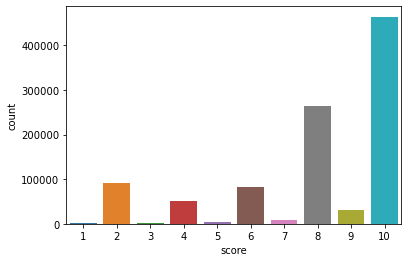

In [44]:
# Let us check count of ratings

sns.countplot(data = df, x = 'score');

We have more than 4 Lakh count for rating 10. For above 5 mobile phones we have max ratings with max reviews. So we can recommend those phones.

As this is Popularity based (not personalized) recommendations for all the users will be same.

### 4. Build a collaborative filtering model using SVD. 
You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model.

In [45]:
# SVD using surprise library
# Let us use data with more than 50 ratings and more than 50 reviews.

reader = Reader(rating_scale = (1, 10))
data = Dataset.load_from_df(data[['author', 'product', 'score']], reader)
data.df.head()

,author,product,score
40003,einem Kunden,"Apple iPhone 7 Plus 5,5"" 128 GB",10
37841,Steve,Samsung Gusto 2 SCH-U365 Flip Phone (Ver,10
15949,unknown,Samsung Samsung Galaxy A5 2016 - Wit,10
9745,Amazon Customer,Samsung Galaxy S7 Edge 32GB UK SIM-Free,10
309352,Capyto,Samsung U800 Cep Telefonu,8


In [46]:
# Splitting data

trainset, testset = train_test_split(data, test_size=.25, random_state = 123)
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x144a82900>

In [47]:
# Checking 1st entry of trainset

print(trainset.to_raw_uid(0))

ÐÐ¼Ð¸ÑÑÐ¸Ð¹


In [48]:
# Running SVD model

svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

In [49]:
# Checking 1st entry from Test data

testset[0]

('Ð¡ÐµÑ\x80Ð³ÐµÐ¹', 'Sony Xperia ZR (Ð±ÐµÐ»Ñ\x8bÐ¹)', 10.0)

In [50]:
# Predicting

test_pred = svd_model.test(testset)

In [51]:
# compute RMSE

accuracy.rmse(test_pred)

RMSE: 2.7193


2.719345244975944

We have got RMSE score of 2.7. Let us check different methods and try to get lower score.

Lesser the score better the result.

In [52]:
# Let us add score in a dataframe

rmse = pd.DataFrame({'Method': ['SVD'], 'RMSE Score': [accuracy.rmse(test_pred)]})
rmse

RMSE: 2.7193


,Method,RMSE Score
0,SVD,2.719345


In [53]:
# KNNWithMeans: Item-Item

algo_i = KNNWithMeans(k = 10, sim_options = {'user_based': False})
algo_i.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [54]:
test_pred = algo_i.test(testset)
print(accuracy.rmse(test_pred))

RMSE: 2.7763
2.7762662488677834


In [55]:
rmse.loc[1] = ['Item-item KNN', accuracy.rmse(test_pred)]
rmse

RMSE: 2.7763


,Method,RMSE Score
0,SVD,2.719345
1,Item-item KNN,2.776266


There is not much difference in SVD and user. Let us use cross validation and see if this score can be improved further.

In [56]:
# Using Cross Validation

cv = cross_validate(algo_i, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.7798  2.7883  2.8028  2.7975  2.7708  2.7879  0.0116  
MAE (testset)     2.1168  2.1126  2.1321  2.1225  2.0990  2.1166  0.0110  
Fit time          145.72  133.19  141.93  169.49  141.86  146.44  12.24   
Test time         341.72  305.63  412.78  398.85  387.93  369.38  39.81   


In [57]:
rmse.loc[2] = ['Item-item CV', '2.7597']
rmse

,Method,RMSE Score
0,SVD,2.71935
1,Item-item KNN,2.77627
2,Item-item CV,2.7597


Results are a little better in case of cross validation.

In [58]:
# KNNWithMeans: User-user

algo_i = KNNWithMeans(k = 10, sim_options = {'user_based': True})
algo_i.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [59]:
test_pred = algo_i.test(testset)
print(accuracy.rmse(test_pred))

RMSE: 2.7777
2.7777495711290108


In [60]:
rmse.loc[3] = ['User-user KNN', accuracy.rmse(test_pred)]
rmse

RMSE: 2.7777


,Method,RMSE Score
0,SVD,2.71935
1,Item-item KNN,2.77627
2,Item-item CV,2.7597
3,User-user KNN,2.77775


Results for Item-item and User-user are almost same. Let us check results after cross validation.

In [61]:
# Using Cross Validation

cv = cross_validate(algo_i, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.7514  2.7599  2.7730  2.7760  2.7595  2.7640  0.0092  
MAE (testset)     2.1112  2.0996  2.1070  2.1082  2.0947  2.1042  0.0061  
Fit time          0.75    1.03    1.41    0.88    0.69    0.95    0.26    
Test time         6.71    10.55   8.00    5.00    4.71    7.00    2.14    


#### 5. Evaluate the collaborative model. Print RMSE value.

In [62]:
rmse.loc[4] = ['User-user CV', '2.7652']
rmse

,Method,RMSE Score
0,SVD,2.71935
1,Item-item KNN,2.77627
2,Item-item CV,2.7597
3,User-user KNN,2.77775
4,User-user CV,2.7652


From above table we can say that cross validations are giving better results. 

Let us finalise User-user CV model as it has the lowest RMSE Score.

#### 6. Predict score (average rating) for test users. 

In [63]:
# Let us select random test and predict score

testset[5]

('Amazon Customer', 'Blu Win JR LTE (Grey, 4GB)', 10.0)

Predicted score for test sample of mobile phone is 8.

#### 7. Report your findings and inferences.

In [64]:
#Let us check 5 entries in test_pred in which we will get all the details

test_pred[:5]

[Prediction(uid='Ð¡ÐµÑ\x80Ð³ÐµÐ¹', iid='Sony Xperia ZR (Ð±ÐµÐ»Ñ\x8bÐ¹)', r_ui=10.0, est=8.473949500439346, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='ozer1299', iid='Nokia 5610 Cep Telefonu', r_ui=8.0, est=8.0, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='e-bit', iid='Smartphone Samsung Galaxy J5 SM-J510M', r_ui=10.0, est=9.4, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='einem Kunden', iid='Samsung Galaxy A3 (2016) - A310F Smartph', r_ui=10.0, est=9.8, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='OnePlus 3 (Soft Gold, 64 GB)', r_ui=8.0, est=8.2, details={'actual_k': 10, 'was_impossible': False})]

From above we see that r_ui(actual value) is exact to est(predicted value) for 3 users and different for 2 users. But it is almost similar. 

We have got best RMSE score for User-user cross validation method. And we have got almost similar result for Item-item CV as well. There is only minor difference.

KNNWithMeans is much better than SVD.

If we could have used all the data then we would have got better results.

#### 8. Try and recommend top 5 products for test users.

In [65]:
test_pred

[Prediction(uid='Ð¡ÐµÑ\x80Ð³ÐµÐ¹', iid='Sony Xperia ZR (Ð±ÐµÐ»Ñ\x8bÐ¹)', r_ui=10.0, est=8.473949500439346, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='ozer1299', iid='Nokia 5610 Cep Telefonu', r_ui=8.0, est=8.0, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='e-bit', iid='Smartphone Samsung Galaxy J5 SM-J510M', r_ui=10.0, est=9.4, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='einem Kunden', iid='Samsung Galaxy A3 (2016) - A310F Smartph', r_ui=10.0, est=9.8, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='OnePlus 3 (Soft Gold, 64 GB)', r_ui=8.0, est=8.2, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Blu Win JR LTE (Grey, 4GB)', r_ui=10.0, est=9.0, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Samsung Galaxy J7 No Contract Phone, 16G', r_ui=6.0, est=8.600000000000001, details={'actual_k

In [66]:
uid = 'Roy'  
iid = 'Huawei P8 grijs / 16 GB'  

# predicting for a specific user and item
pred = algo_i.predict(uid, iid, r_ui=0.0, verbose=True)

user: Roy        item: Huawei P8 grijs / 16 GB r_ui = 0.00   est = 8.39   {'actual_k': 10, 'was_impossible': False}


In [67]:
pred = pd.DataFrame(test_pred)
pred[pred['uid'] == 'Roy'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(10)

,iid,r_ui,est
165,Samsung Galaxy A3 SM-A300FU SIM-Free Sma,10.0,7.098419
607,"Nokia Lumia 520 GSM Unlock 3G Phone, 4-I",10.0,8.005251
15506,Sony Xperia Z C6602 Unlocked Phone with,10.0,7.716463
21649,Sim Free Samsung Galaxy S7 Edge Mobile P,10.0,9.835252
21667,"Honor 6X (Gold, 32GB)",10.0,8.096707
25268,Motorola EM326g Prepaid Phone (Net10),10.0,7.896707
803,Motorola Droid 3 Verizon Xt862 Verizon C,8.0,4.958858
3245,Sony Xperia M2 - Smartphone libre Androi,8.0,8.779849
11374,Samsung Galaxy S7 zwart / 32 GB,8.0,7.851000
22867,Sony Xperia XZ zwart / 32 GB,8.0,9.130649


#### 9. Try cross validation techniques to get better results.

In [68]:
# Let us use Gridsearch CV

param_grid = {'n_epochs': [15, 20], 'lr_all': [0.002, 0.005],
              'reg_all': [0.1, 0.2]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv = 5)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

2.605960072226137
{'n_epochs': 15, 'lr_all': 0.005, 'reg_all': 0.2}


Earlier we have got result around 2.7 now we it has improved to 2.6

#### 10. In what business scenario you should use popularity based Recommendation Systems ?

Whenever we do not have any information about user, we need to use this Recommendation System.

eg. For any online shopping if the user has not signed up or signed in or user is using incognito mode that time we can go for Popularity based RS. 

#### 11. In what business scenario you should use CF based Recommendation Systems ?

In collaborative filtering we have two types: User-user CF and Item-item CF.

We find similarity between users/items and predict their behaviour. 

We can recommend movies, books, purchasing items, news highlights, discount offers etc.

In short, we can use collaborative filtering whenever we need to recommend products when we know user/product details.

#### 12. What other possible methods can you think of which can further improve the recommendation for different users ?

A single recommendation system might not help because there are a lot of products which gives number of recommendations, also in some cases it gives unrelated recommendations. So it is necessary to use hybrid model.

For users who has not given much reviews, we dont have much information about them in that case we can hybrid that with popularity RS.

Most of the customers has not provided their names, they have used generalised names (eg. Amazon Customer) due to which we are not getting accurate results because model thinks that its a single customer but in reality they can be different as number of reveiws are more than 50k.